# Import the Dataset

In [57]:
# Dependencies
import pandas as pd
from pathlib import Path
from ast import literal_eval

# Filtered Dataset
filtered_data = Path("Datasets/filtered_data.csv")
filtered_df = pd.read_csv(filtered_data)
filtered_df.head()


,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director
0,Mother's Day,6.0,94,['Akson Studio'],0,2016.0,5.6,38894.0,32460000.0,"['Comedy', ' Drama', ' Romance']",PG-13,['Garry Marshall']
1,Spider-Man: Into the Spider-Verse,8.4,13081,"['Columbia Pictures', 'Lord Miller', 'Pascal P...",375464627,2018.0,8.4,632177.0,190240000.0,"['Animation', ' Action', ' Adventure']",PG,"['Bob Persichetti', 'Peter Ramsey', 'Rodney Ro..."
2,Transformers: Age of Extinction,5.9,7359,"['di Bonaventura Pictures', 'Tom DeSanto/Don M...",1104054072,2014.0,5.6,326960.0,245440000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
3,Transformers: The Last Knight,6.1,5548,"['Paramount', 'di Bonaventura Pictures', 'Ian ...",605425157,2017.0,5.2,164230.0,130170000.0,"['Action', ' Adventure', ' Sci-Fi']",PG-13,['Michael Bay']
4,Guardians of the Galaxy Vol. 2,7.6,19898,['Marvel Studios'],863756051,2017.0,7.6,736895.0,389810000.0,"['Action', ' Adventure', ' Comedy']",PG-13,['James Gunn']


In [58]:
# Number of movies in our data set
print(f"There are {filtered_df['Movie Name'].count()} Movies in our data set")

There are 1384 Movies in our data set


# Examine Net Revenue

In [59]:
# Refine results to only relevant data
rev_df = filtered_df[["Movie Name", "Revenue", "Movie Rating"]]
rev_df.head()

,Movie Name,Revenue,Movie Rating
0,Mother's Day,0,5.6
1,Spider-Man: Into the Spider-Verse,375464627,8.4
2,Transformers: Age of Extinction,1104054072,5.6
3,Transformers: The Last Knight,605425157,5.2
4,Guardians of the Galaxy Vol. 2,863756051,7.6


In [60]:
#Find correlation
correlation = rev_df[['Revenue', 'Movie Rating']].corr()
c_cf = correlation.loc['Revenue', 'Movie Rating']
print(f"Correlation coefficient: {c_cf}")

Correlation coefficient: 0.23456630676624393


In [61]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

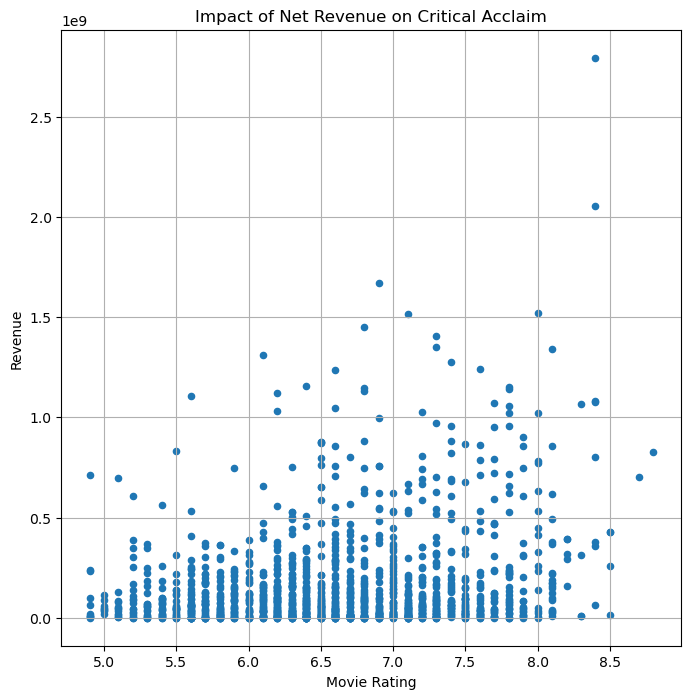

In [62]:
# Make a scatter plot
rev_df.plot(kind="scatter", x="Movie Rating", y="Revenue", grid=True, figsize=(8,8),
              title="Impact of Net Revenue on Critical Acclaim")
plt.show()

In [63]:
# Statistical Analysis
rev_quartiles = rev_df["Revenue"].quantile([.25,.5,.75])
rev_lowerq = rev_quartiles[.25]
rev_upperq = rev_quartiles[.75]
rev_iqr = rev_upperq - rev_lowerq


In [64]:
# Print results
print(f"The lower quartile of Net revenue is: {rev_lowerq}")
print(f"The upper quartile of Net revenue is: {rev_upperq}")
print(f"The interquartile range of Net revenue is: {rev_iqr}")
print(f"The the median of Net revenue is: {rev_quartiles[0.5]} ")

The lower quartile of Net revenue is: 17546224.25
The upper quartile of Net revenue is: 190328618.25
The interquartile range of Net revenue is: 172782394.0
The the median of Net revenue is: 71462585.0 


In [65]:
# Find potential outliers range
rev_lower_bound = rev_lowerq - (1.5*rev_iqr)
rev_upper_bound = rev_upperq + (1.5*rev_iqr)
print(f"Net Revenue below {rev_lower_bound} could be outliers.")
print(f"Net Revenue above {rev_upper_bound} could be outliers.")

Net Revenue below -241627366.75 could be outliers.
Net Revenue above 449502209.25 could be outliers.


In [66]:
# Find potential outliers
outlier_rev= rev_df.loc[(rev_df['Revenue'] < rev_lower_bound) | (rev_df['Revenue'] > rev_upper_bound)]
outlier_rev

,Movie Name,Revenue,Movie Rating
2,Transformers: Age of Extinction,1104054072,5.6
3,Transformers: The Last Knight,605425157,5.2
4,Guardians of the Galaxy Vol. 2,863756051,7.6
6,Avengers: Infinity War,2052415039,8.4
7,Fast & Furious Presents: Hobbs & Shaw,760098996,6.5
...,...,...,...
598,Fantastic Beasts: The Crimes of Grindelwald,654855901,6.5
647,Oz the Great and Powerful,491868548,6.3
1030,Fast Five,626137675,7.3
1235,The Secret Life of Pets,875457937,6.5


In [67]:
# Find the lowest and highest critical ratings for potential outliers
print(f"The lowest critical rating of the potential outliers for net revenue is {outlier_rev['Movie Rating'].min()}")
print(f"The highest critical rating of the potential outliers for net revenue is {outlier_rev['Movie Rating'].max()}")

The lowest critical rating of the potential outliers for net revenue is 4.9
The highest critical rating of the potential outliers for net revenue is 8.8


In [68]:
# Find the number of potential outliers
print(f"There are {outlier_rev['Movie Name'].count()} potential outliers for net revenue")

There are 134 potential outliers for net revenue


# Examine Gross Revenue

In [69]:
# Refine the results to only relevant data
gross_df = filtered_df[["Movie Name", "Gross", "Movie Rating"]]
gross_df.head()

,Movie Name,Gross,Movie Rating
0,Mother's Day,32460000.0,5.6
1,Spider-Man: Into the Spider-Verse,190240000.0,8.4
2,Transformers: Age of Extinction,245440000.0,5.6
3,Transformers: The Last Knight,130170000.0,5.2
4,Guardians of the Galaxy Vol. 2,389810000.0,7.6


In [70]:
#Find correlation
correlation = gross_df[['Gross', 'Movie Rating']].corr()
c_cf = correlation.loc['Gross', 'Movie Rating']
print(f"Correlation coefficient: {c_cf}")

Correlation coefficient: 0.23964256181379562


In [71]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

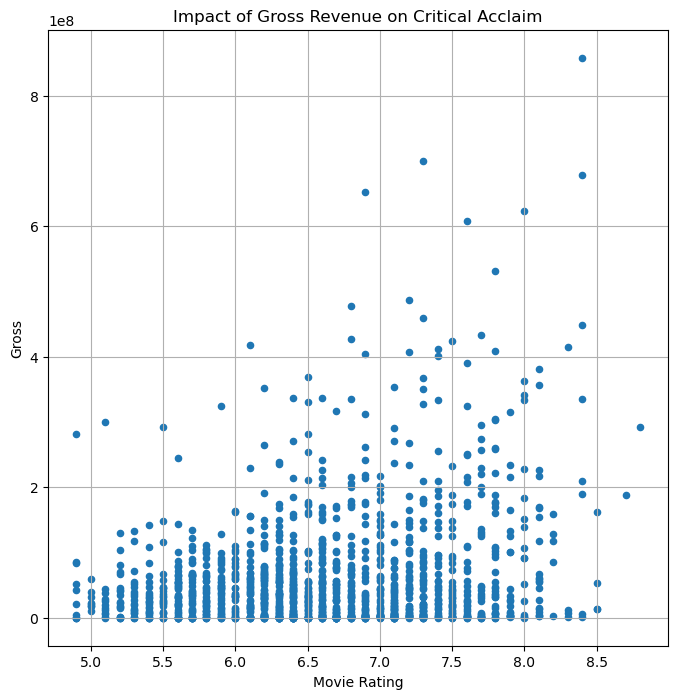

In [72]:
# Make a scatter plot
gross_df.plot(kind="scatter", x="Movie Rating", y="Gross", grid=True, figsize=(8,8),
              title="Impact of Gross Revenue on Critical Acclaim")
plt.show()

In [73]:
# Statistical Analysis
gross_quartiles = gross_df["Gross"].quantile([.25,.5,.75])
gross_lowerq = gross_quartiles[.25]
gross_upperq = gross_quartiles[.75]
gross_iqr = gross_upperq - gross_lowerq

In [74]:
# Print results
print(f"The lower quartile of gross revenue is: {gross_lowerq}")
print(f"The upper quartile of gross revenue is: {gross_upperq}")
print(f"The interquartile gross of revenue is: {gross_iqr}")
print(f"The the median of gross is: {gross_quartiles[0.5]} ")

The lower quartile of gross revenue is: 6560000.0
The upper quartile of gross revenue is: 80412500.0
The interquartile gross of revenue is: 73852500.0
The the median of gross is: 35040000.0 


In [75]:
# Find potential outliers range
gross_lower_bound = gross_lowerq - (1.5*gross_iqr)
gross_upper_bound = gross_upperq + (1.5*gross_iqr)
print(f"Gross Revenue below {gross_lower_bound} could be outliers.")
print(f"Gross Revenue above {gross_upper_bound} could be outliers.")

Gross Revenue below -104218750.0 could be outliers.
Gross Revenue above 191191250.0 could be outliers.


In [76]:
outlier_gross= gross_df.loc[(gross_df['Gross'] < gross_lower_bound) | (gross_df['Gross'] > gross_upper_bound)]
outlier_gross

,Movie Name,Gross,Movie Rating
2,Transformers: Age of Extinction,245440000.0,5.6
4,Guardians of the Galaxy Vol. 2,389810000.0,7.6
6,Avengers: Infinity War,678820000.0,8.4
8,The Amazing Spider-Man 2,202850000.0,6.6
12,Spider-Man: Homecoming,334200000.0,7.4
...,...,...,...
464,Spectre,200070000.0,6.8
563,Gravity,274090000.0,7.7
647,Oz the Great and Powerful,234910000.0,6.3
1030,Fast Five,209840000.0,7.3


In [77]:
# Find the lowest and highest critical ratings for potential outliers
print(f"The lowest critical rating of the potential outliers for gross revenue is {outlier_gross['Movie Rating'].min()}")
print(f"The highest critical rating of the potential outliers for gross revenue is {outlier_gross['Movie Rating'].max()}")

The lowest critical rating of the potential outliers for gross revenue is 4.9
The highest critical rating of the potential outliers for gross revenue is 8.8


In [78]:
#Find the number of potential outliers
print(f"There are {outlier_gross['Movie Name'].count()} potential outliers for gross revenue")

There are 105 potential outliers for gross revenue


# Ratings outliers

In [79]:
# Statistical Analysis
filtered_quartiles = filtered_df["Movie Rating"].quantile([.25,.5,.75])
filtered_lowerq  = filtered_quartiles[.25]
filtered_upperq = filtered_quartiles[.75]
filtered_iqr = filtered_upperq - filtered_lowerq

In [80]:
print(f"The lower quartile of Critical Ratings is: {filtered_lowerq}")
print(f"The upper quartile of Critical Ratings is: {filtered_upperq}")
print(f"The interquartile of Critical Ratings is: {filtered_iqr}")
print(f"The the median of Critical Ratings is: {filtered_quartiles[0.5]} ")

The lower quartile of Critical Ratings is: 6.1
The upper quartile of Critical Ratings is: 7.2
The interquartile of Critical Ratings is: 1.1000000000000005
The the median of Critical Ratings is: 6.6 


In [81]:
# Find potential outliers range
filtered_lower_bound = filtered_lowerq - (1.5*filtered_iqr)
filtered_upper_bound = filtered_upperq + (1.5*filtered_iqr)
print(f"Critical Ratings below {filtered_lower_bound} could be outliers.")
print(f"Critical Ratings above {filtered_upper_bound} could be outliers.")

Critical Ratings below 4.449999999999999 could be outliers.
Critical Ratings above 8.850000000000001 could be outliers.


In [82]:
outlier_filtered= filtered_df.loc[(filtered_df['Movie Rating'] < filtered_lower_bound) | (filtered_df['Movie Rating'] > filtered_upper_bound)]
outlier_filtered

,Movie Name,Vote Average,Vote Count,Production Companies,Revenue,Year of Release,Movie Rating,Votes,Gross,Genre,Certification,Director


In [84]:
# Find the number of outliers
print(f"There are {outlier_filtered['Movie Name'].count()} potential outliers for critical rating")

There are 0 potential outliers for critical rating
